# 🏧 Loan Eligibility Prediction 💰 using Machine Learning Models 🤖

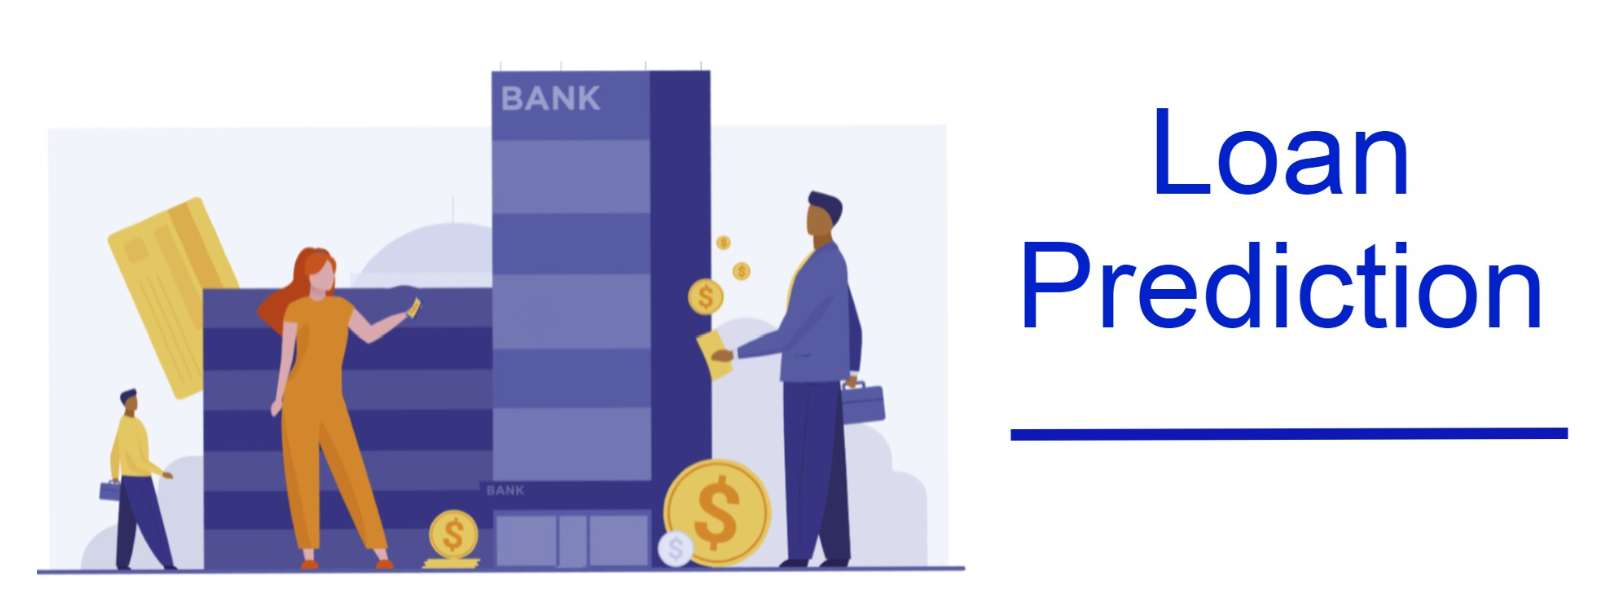

## In this notebook kernal, I'm going to predictions customers are eligible for the loan.

#### The major aim of this notebook is to predict which of the customers will have their loan approved.


# Steps are :
##### Loading data  
##### Exploratory Data Analysis
##### Data Visualizations
##### Machine Learning Model Decision.
##### Traing the ML Model
##### Predict Model
##### Accuracy check

### Importing Libraries

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

### Importing & Loading the dataset

In [99]:
df_train = pd.read_csv('loan-train.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [100]:
df_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [101]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [102]:
df_test= pd.read_csv('loan-test.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


##### Loan_ID--------------> Unique Loan ID.  
##### Gender --------------> Male/ Female
##### Married --------------> Applicant married (Y/N)
##### Dependents ------------> Number of dependents
##### Education -------------> Applicant Education (Graduate/ Under Graduate)
##### Self_Employed ---------> Self-employed (Y/N)
##### ApplicantIncome -------> Applicant income
##### CoapplicantIncome -----> Coapplicant income
##### LoanAmount -----------> Loan amount in thousands
##### Loan_Amount_Term ------> Term of a loan in months
##### Credit_History --------> Credit history meets guidelines
##### Property_Area ---------> Urban/ Semi-Urban/ Rural
##### Loan_Status -----------> Loan approved (Y/N)

## Dataset Info:

In [103]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Dataset Shape:

In [104]:
df_train.shape,df_test.shape

((614, 13), (367, 12))

In [105]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data Cleaning

### Checking the Missing Values

In [106]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### First we will fill the Missing Numerical column  by the 'Mean' & 'Mode' of the respective variables.

In [107]:
df_train['Credit_History'].fillna(df_train['Credit_History'].mode(),inplace=True ) 
df_test['Credit_History'].fillna(df_test['Credit_History'].mode(), inplace=True) 


df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True) 
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(), inplace=True) 

### Converting Categorical variable with Numerical values.

Loan_Status feature boolean values, So we replace Y values with 1 and N values with 0 and same for other Boolean types of columns

### Now again converting all values with mode

In [108]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True)

df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace=True)

df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_test['Married'].fillna(df_test['Married'].mode()[0], inplace=True)

df_train['Credit_History'].fillna(df_train['Credit_History'].mean(), inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mean(), inplace=True)

df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace=True)

df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0], inplace=True)



In [109]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [110]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### Here, Property_Area, Dependents and Education has multiple values so now we can use LabelEncoder from sklearn package

In [111]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.fit_transform(df_test[col])

##### Here, we have dropped all the missing values to avoid disturbances in the model. The Loan Prediction requires all the details to work efficiently and thus the missing values are dropped.

### Now, Let's check the final Dataset Shape

In [112]:
df_train.shape,df_test.shape

((614, 13), (367, 12))

### Data Visualizations

<AxesSubplot:>

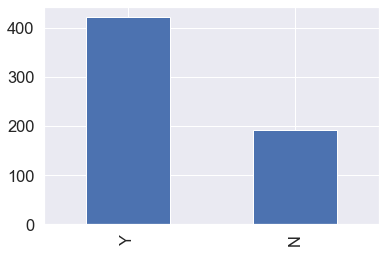

In [92]:
df_train['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

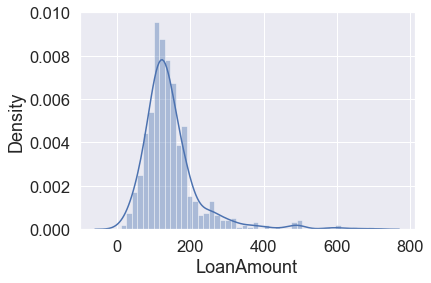

In [93]:
sns.distplot(df_train.LoanAmount)

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

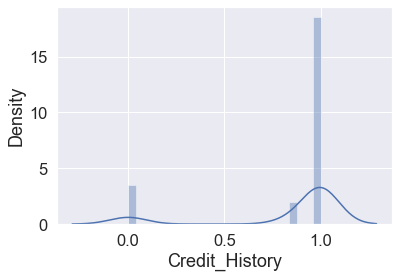

In [94]:
sns.distplot(df_train.Credit_History)

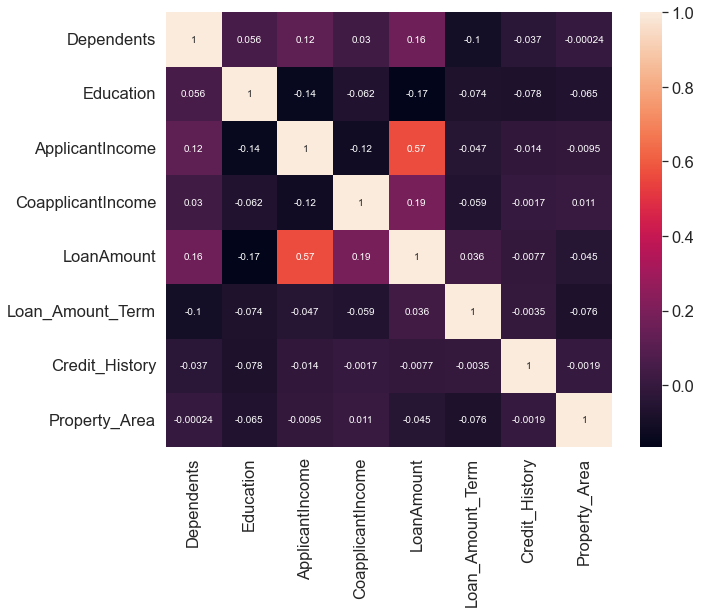

In [95]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),annot=True)
sns.set_theme(font_scale=1)

#### Here we can observe that Loan Amount and Applicant Income is highly related

### Comparison between Parameters in getting the Loan:

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

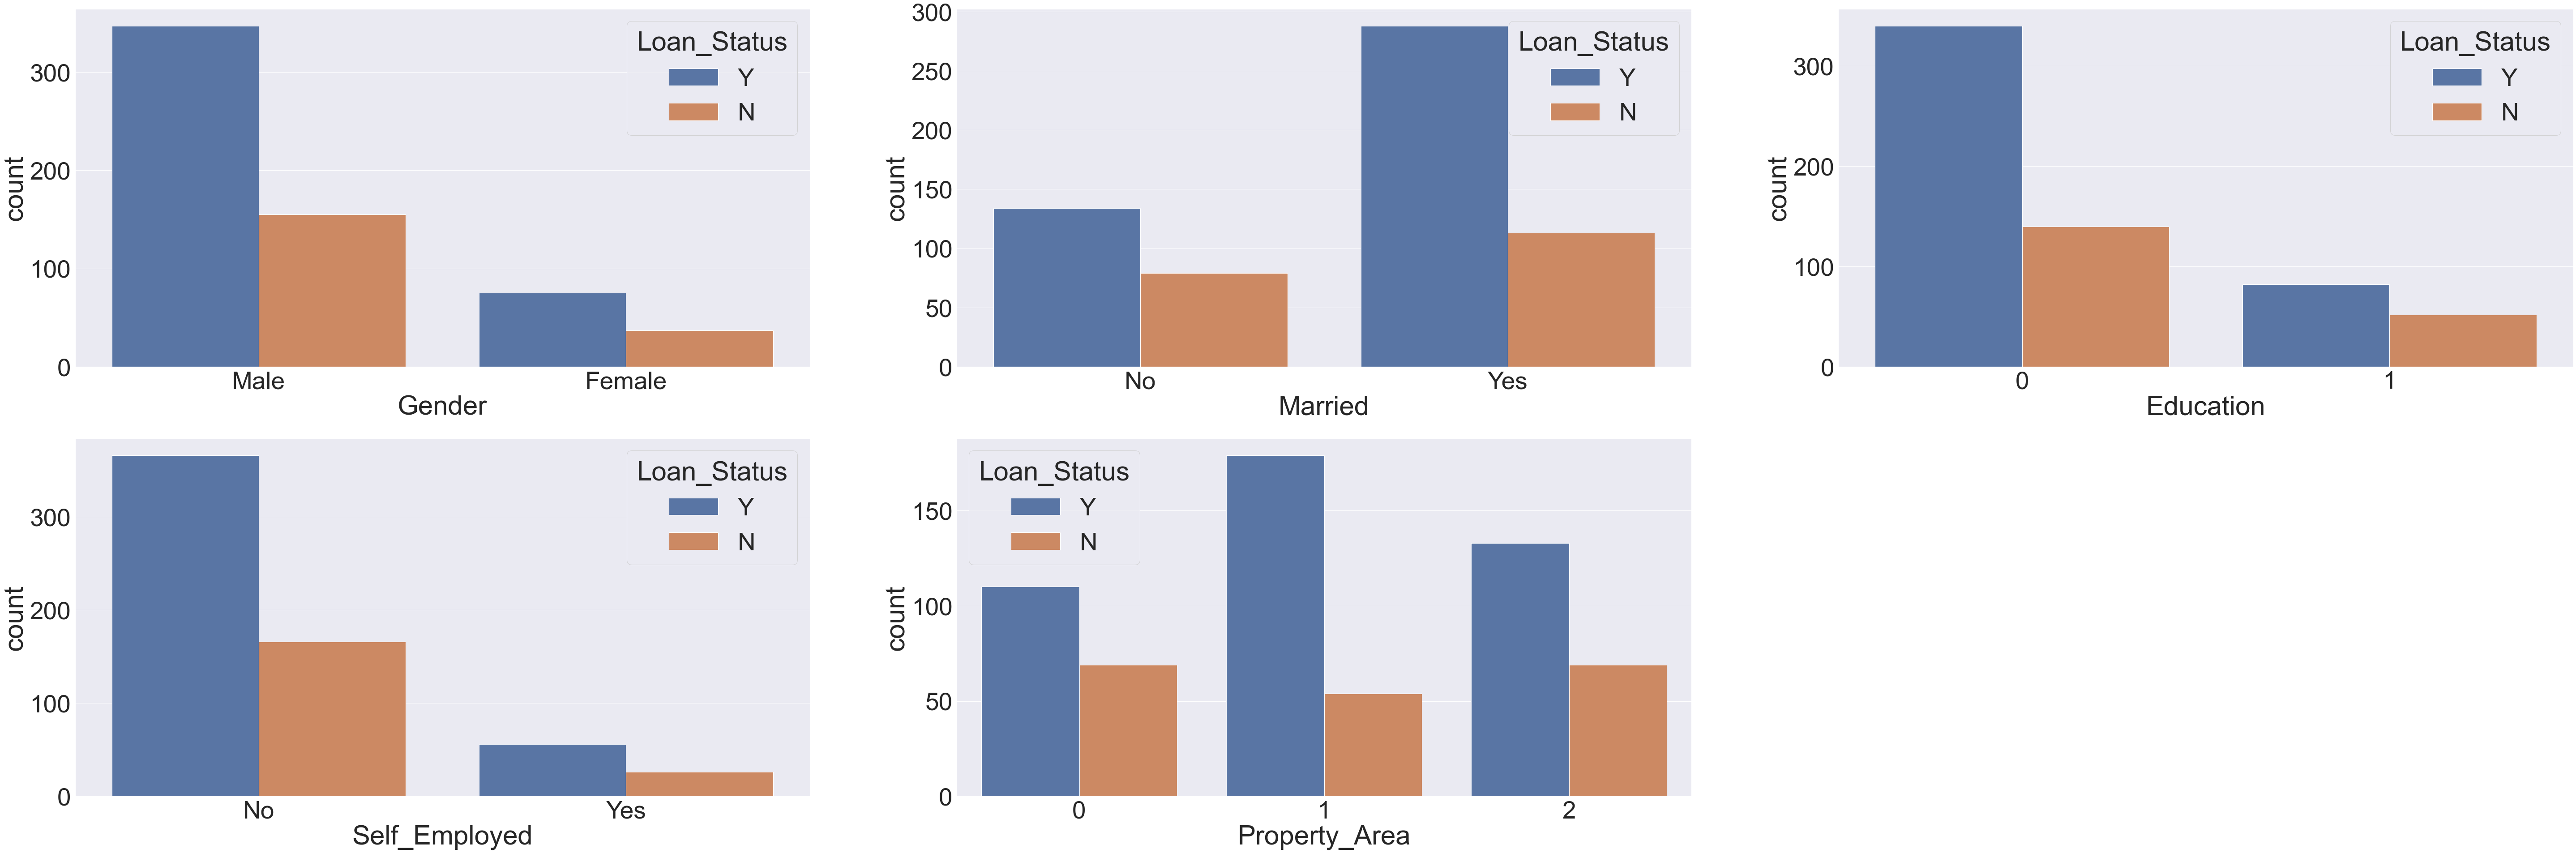

In [169]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(df_train['Gender'],hue=df_train['Loan_Status'])

plt.subplot(332)
sns.countplot(df_train['Married'],hue=df_train['Loan_Status'])

plt.subplot(333)
sns.countplot(df_train['Education'],hue=df_train['Loan_Status'])

plt.subplot(334)
sns.countplot(df_train['Self_Employed'],hue=df_train['Loan_Status'])

plt.subplot(335)
sns.countplot(df_train['Property_Area'],hue=df_train['Loan_Status'])



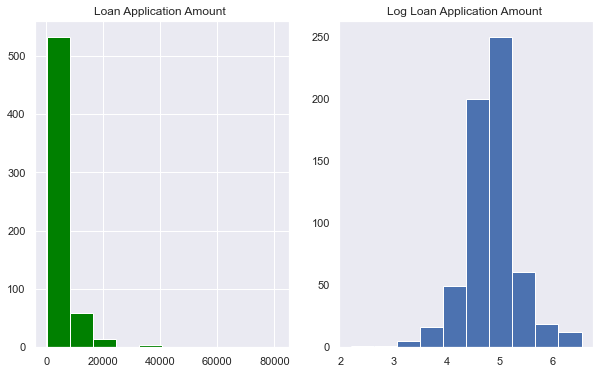

In [96]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)


df_train['ApplicantIncome'].hist(bins=10,color='green')
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(df_train['LoanAmount']))
plt.title("Log Loan Application Amount ")
sns.set_theme(font_scale=1.5)
plt.show()

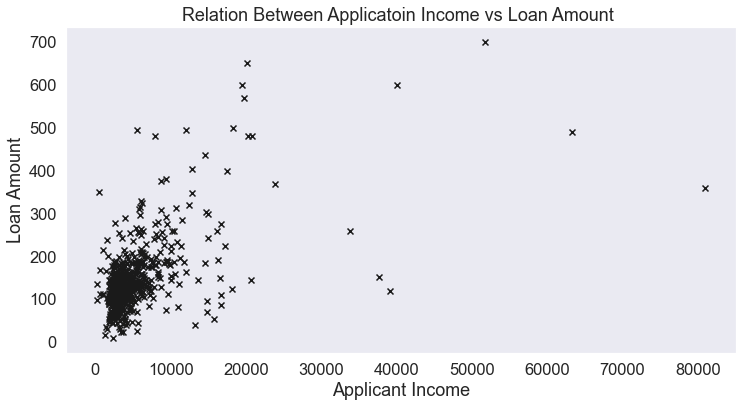

In [97]:
plt.figure(figsize=(12, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(df_train['ApplicantIncome'] , df_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [113]:
#created new column
df_train['Total_income'] = df_train['ApplicantIncome']+df_train['CoapplicantIncome']

In [114]:
cols = ['ApplicantIncome', 'CoapplicantIncome']
df = df_train.drop(columns=cols, axis=1,inplace=True)

<AxesSubplot:xlabel='Total_income', ylabel='Density'>

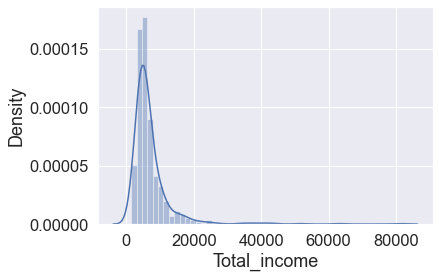

In [100]:
sns.distplot(df_train.Total_income)

In [115]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,0,No,146.412162,360.0,1.0,2,Y,5849.0
1,LP001003,Male,Yes,1,0,No,128.000000,360.0,1.0,0,N,6091.0
2,LP001005,Male,Yes,0,0,Yes,66.000000,360.0,1.0,2,Y,3000.0
3,LP001006,Male,Yes,0,1,No,120.000000,360.0,1.0,2,Y,4941.0
4,LP001008,Male,No,0,0,No,141.000000,360.0,1.0,2,Y,6000.0


In [116]:
df_test['Total_income'] = df_test['ApplicantIncome']+df_test['CoapplicantIncome']
cols = ['ApplicantIncome', 'CoapplicantIncome','Loan_ID']
df = df_test.drop(columns=cols, axis=1,inplace=True)

In [117]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,Male,Yes,0,0,No,110.0,360.0,1.000000,2,5720
1,Male,Yes,1,0,No,126.0,360.0,1.000000,2,4576
2,Male,Yes,2,0,No,208.0,360.0,1.000000,2,6800
3,Male,Yes,2,0,No,100.0,360.0,0.825444,2,4886
4,Male,No,0,1,No,78.0,360.0,1.000000,2,3276


## Now from here we will apply our models

In [118]:
y=df_train['Loan_Status']

In [119]:
X=df_train.drop(columns=['Loan_Status','Loan_ID'])

In [120]:
X.head(5)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,Male,No,0,0,No,146.412162,360.0,1.0,2,5849.0
1,Male,Yes,1,0,No,128.000000,360.0,1.0,0,6091.0
2,Male,Yes,0,0,Yes,66.000000,360.0,1.0,2,3000.0
3,Male,Yes,0,1,No,120.000000,360.0,1.0,2,4941.0
4,Male,No,0,0,No,141.000000,360.0,1.0,2,6000.0


In [121]:
y.head(5)

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [154]:
X=pd.get_dummies(X)

In [155]:
X.shape,y.shape

((614, 13), (614,))

In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [157]:
X_train.shape, X_test.shape

((491, 13), (123, 13))

# Model Building

#### Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [179]:
lr=LogisticRegression()

In [180]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_pred,y_test)


0.8617886178861789

##### Accuracy Score is 86.17%

### Decision Tree

In [173]:
from sklearn.tree import DecisionTreeClassifier

In [174]:
dtr=DecisionTreeClassifier()

In [175]:
dtr.fit(X_train,y_train)

DecisionTreeClassifier()

In [176]:
y_pred=dtr.predict(X_test)

In [177]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)


0.7886178861788617

### Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
rfc= RandomForestClassifier()

In [171]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [172]:
y_pred=rfc.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7073170731707317

### Hyperparameter Tuning

In [181]:
# Randomized Search CV:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100,stop=1000,num=20)]
criterion=['gini','entropy']
max_features=['sqrt','auto','log2']
max_depth=[int(x) for x in np.linspace(10,1000,10)]
min_samples_split=[2,5,10,14]
min_samples_leaf=[1,2,4,6,8]

In [182]:
random_grid={
    'n_estimators':n_estimators,
    'criterion':criterion,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [183]:
rf_random_cv=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,cv=3,random_state=0,n_iter=100,n_jobs=-1,)

In [184]:
rf_random_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 147, 194, 242,
                                                         289, 336, 384, 431,
                                                         478, 526, 573, 621,
                                                         668, 715, 763, 810,
         

In [185]:
rf_random_cv.best_params_

{'n_estimators': 668,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 560,
 'criterion': 'gini'}

In [186]:
best_random_grid=rf_random_cv.best_estimator_

In [187]:
y_pred=best_random_grid.predict(X_test)

In [188]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8536585365853658

In [189]:
# gridsearch cv on decision tree:
from sklearn.model_selection import GridSearchCV
param_grid={
    'max_depth':[int(x) for x in np.linspace(2,10,5)],
    'max_features':['sqrt','auto','log2'],
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'min_samples_split':[2,5,10,14],
    'min_samples_leaf':[1,2,4,6,8]
}

In [190]:
dt_gridsearch=GridSearchCV(estimator=dtr,param_grid=param_grid,n_jobs=-1,cv=10)

In [191]:
dt_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 14],
                         'splitter': ['best', 'random']})

In [192]:
dt_gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 14,
 'splitter': 'random'}

In [193]:
best_grid_cv=dt_gridsearch.best_estimator_

In [194]:
y_pred=best_grid_cv.predict(X_test)

In [195]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8455284552845529

In [199]:
df_test=pd.get_dummies(df_test)
df_test.head()

,Dependents,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes
0,0,0,110.0,360.0,1.000000,2,5720,0,1,0,1,1,0
1,1,0,126.0,360.0,1.000000,2,4576,0,1,0,1,1,0
2,2,0,208.0,360.0,1.000000,2,6800,0,1,0,1,1,0
3,2,0,100.0,360.0,0.825444,2,4886,0,1,0,1,1,0
4,0,1,78.0,360.0,1.000000,2,3276,0,1,1,0,1,0


#### The accuracy of  Logistic Regression model  is 86.17%.So, best model to work with this data is Logistic Regression.
 

In [202]:
y_pred=lr.predict(df_test)

In [203]:
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y